## Importing the Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Collecting the data

In [70]:
data_2019 = pd.read_csv('test.csv')

In [71]:
data_2019 = data_2019.dropna(how='any',axis=0) 

In [72]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Data columns (total 37 columns):
Rating                18159 non-null int64
Preferred             18159 non-null int64
Acceleration          18159 non-null float64
Age                   18159 non-null int64
Aggression            18159 non-null float64
Agility               18159 non-null float64
Balance               18159 non-null float64
Ball_Control          18159 non-null float64
Composure             18159 non-null float64
Crossing              18159 non-null float64
Curve                 18159 non-null float64
Dribbling             18159 non-null float64
Finishing             18159 non-null float64
Freekick_Accuracy     18159 non-null float64
GK_Diving             18159 non-null float64
GK_Handling           18159 non-null float64
GK_Kicking            18159 non-null float64
GK_Positioning        18159 non-null float64
GK_Reflexes           18159 non-null float64
Heading               18159 non-null float

In [50]:
Y_2019 = data_2019['Rating']

In [51]:
Y_2019.head()

0    94
1    94
2    92
3    91
4    91
Name: Rating, dtype: int64

In [52]:
X_2019 = data_2019[['Preferred','Age','Acceleration','Aggression','Agility','Attacking_Position',
                   'Balance','Ball_Control','Composure','Crossing','Curve','Dribbling','Finishing','Freekick_Accuracy',
                   'GK_Diving','GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes',
                   'Heading','Interceptions','Jumping','Long_Pass','Long_Shots','Marking',
                   'Penalties','Reactions','Short_Pass','Shot_Power','Sliding_Tackle',
                   'Sprint','Stamina','Standing_Tackle','Strength','Vision','Volleys']]

In [53]:
X_2019.drop('Acceleration', inplace = True, axis = 1)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
X_2019.head()

,Preferred,Age,Aggression,Agility,Attacking_Position,Balance,Ball_Control,Composure,Crossing,Curve,...,Reactions,Short_Pass,Shot_Power,Sliding_Tackle,Sprint,Stamina,Standing_Tackle,Strength,Vision,Volleys
0,0,31,48.0,91.0,94.0,95.0,96.0,96.0,84.0,93.0,...,95.0,90.0,85.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0
1,1,33,63.0,87.0,95.0,70.0,94.0,95.0,84.0,81.0,...,96.0,81.0,95.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0
2,2,26,56.0,96.0,89.0,84.0,95.0,94.0,79.0,88.0,...,94.0,84.0,80.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0
3,3,27,38.0,60.0,12.0,43.0,42.0,68.0,17.0,21.0,...,90.0,50.0,31.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0
4,4,27,76.0,79.0,87.0,77.0,91.0,88.0,93.0,85.0,...,91.0,92.0,91.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0


In [55]:
from sklearn.externals import joblib

In [12]:
model = joblib.load('RFC.sav')

In [56]:
predictions = model.predict(X_2019)

In [65]:
print(predictions[:10])
print(Y_2019[:10])

[91.59  82.263 87.287 84.348 85.612 90.232 89.192 85.921 84.213 81.708]
0    94
1    94
2    92
3    91
4    91
5    91
6    91
7    91
8    91
9    90
Name: Rating, dtype: int64


In [57]:
from sklearn.metrics import mean_squared_error
errors = abs(predictions - Y_2019)
# Print out the mean absolute error (mae)
print('Mean Squared Error:', mean_squared_error(predictions, Y_2019), 'degrees.')

Mean Squared Error: 13.423660564196474 degrees.


In [58]:
mape = 100 * (errors / Y_2019)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')

Accuracy: 95.5 %.


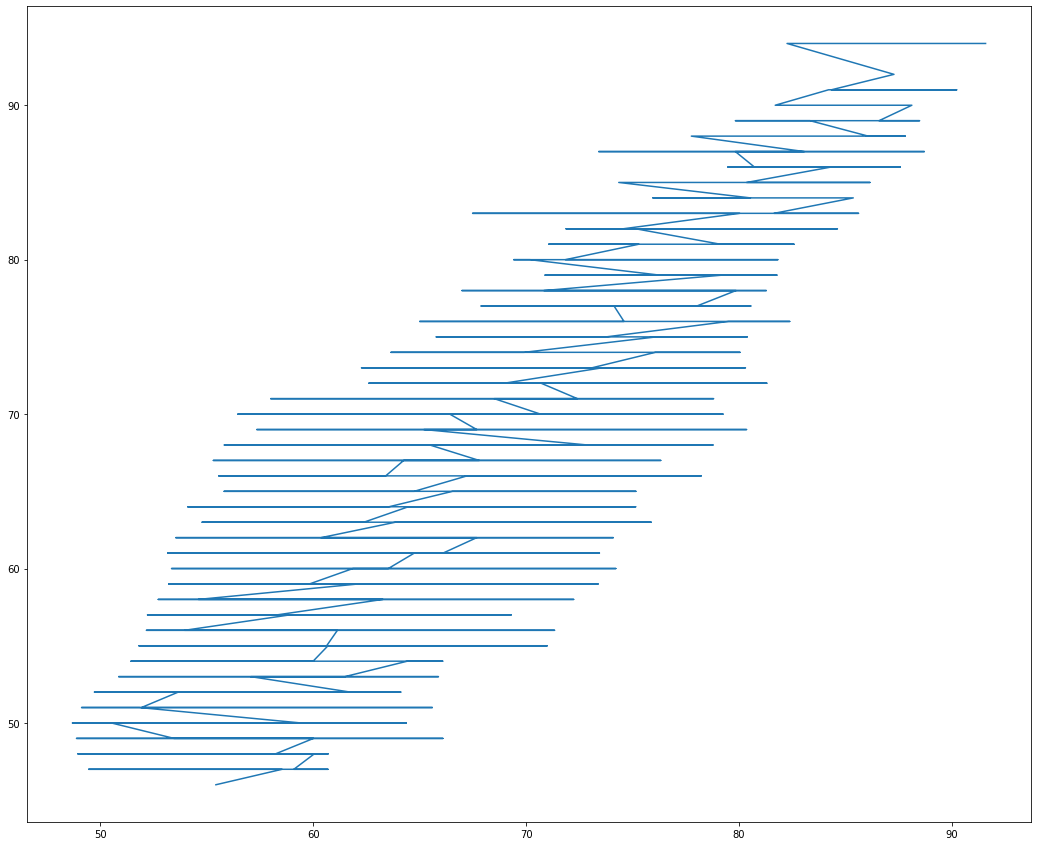

In [62]:
plt.figure(figsize = (18,15))
plt.plot(predictions, Y_2019)

In [66]:
fifa = pd.read_csv('combined_csv - 2018.csv')

In [68]:
y_18 = fifa['Rating']

In [69]:
print(y_18[:10])
print(Y_2019[:10])
print(predictions[:10])

0    94
1    92
2    91
3    90
4    89
5    88
6    88
7    88
8    87
9    86
Name: Rating, dtype: int64
0    94
1    94
2    92
3    91
4    91
5    91
6    91
7    91
8    91
9    90
Name: Rating, dtype: int64
[91.59  82.263 87.287 84.348 85.612 90.232 89.192 85.921 84.213 81.708]


In [75]:
file = pd.DataFrame([predictions, Y_2019])

In [76]:
file

,0,1,2,3,4,5,6,7,8,9,...,18149,18150,18151,18152,18153,18154,18155,18156,18157,18158
0,91.59,82.263,87.287,84.348,85.612,90.232,89.192,85.921,84.213,81.708,...,56.307,50.98,52.69,60.696,49.726,58.77,51.338,55.94,58.538,55.432
1,94.00,94.000,92.000,91.000,91.000,91.000,91.000,91.000,91.000,90.000,...,47.000,47.00,47.00,47.000,47.000,47.00,47.000,47.00,47.000,46.000
